In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# **Problem statement**

This project aims to leverage a comprehensive dataset of daily gold prices spanning from January 19,
2014, to January 22, 2024, obtained from Nasdaq. The dataset encompasses key financial metrics for
each trading day, including the opening and closing prices, trading volume, as well as the highest and
lowest prices recorded during the day.

Reading gold stock data (avaliable at: https://www.kaggle.com/datasets/sahilwagh/gold-stock-prices)

In [427]:
df= pd.read_csv('/content/goldstock.csv')

In [428]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [429]:
df.shape

(2511, 7)

Searching for outliers by BoxPlot

<Figure size 1500x800 with 0 Axes>

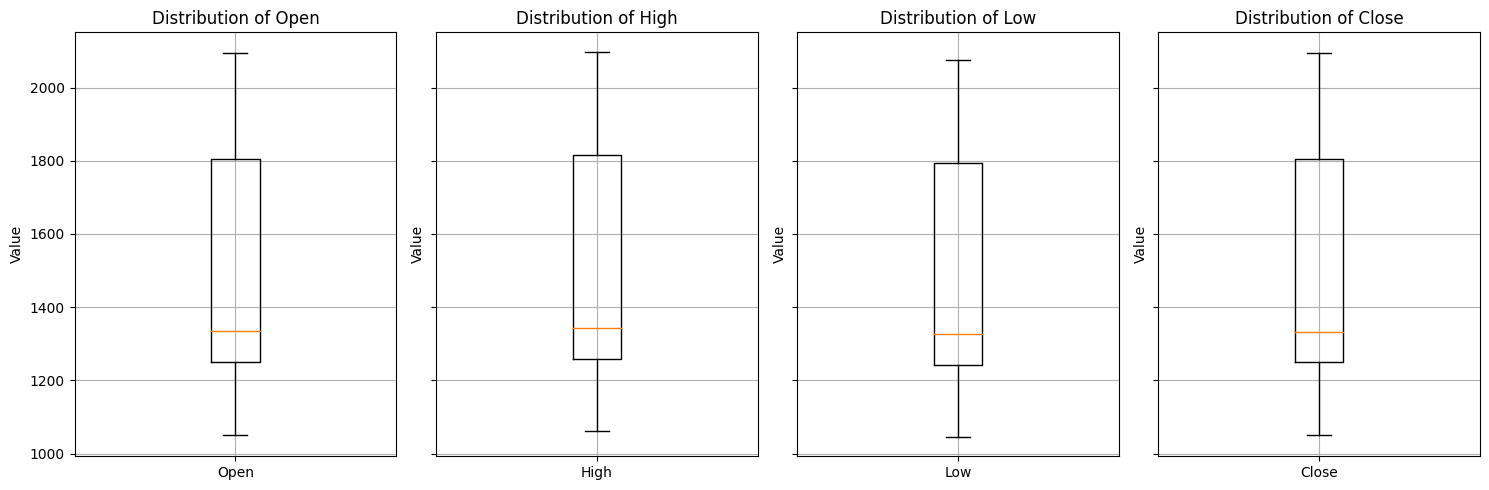

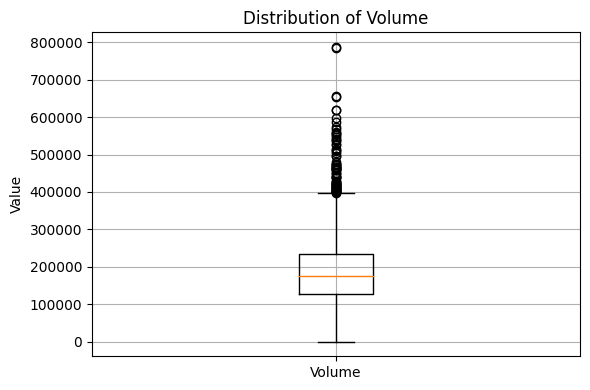

In [430]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

features_to_plot = ['Open', 'High', 'Low', 'Close']
num_features = len(features_to_plot)

# Create subplots
fig, axes = plt.subplots(1, num_features, figsize=(15, 5), sharey=True)

for i, feature in enumerate(features_to_plot):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_ylabel('Value')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Plot box plot for 'Volume'
plt.figure(figsize=(6, 4))
plt.boxplot(df['Volume'])
plt.title('Distribution of Volume')
plt.ylabel('Value')
plt.xticks([1], ['Volume'])
plt.grid(True)
plt.tight_layout()
plt.show()


Identify rows with outliers

In [431]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['Volume'], 25)
Q3 = np.percentile(df['Volume'], 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)]

print("Outliers identified using IQR method:")
print(outliers)


Outliers identified using IQR method:
      Unnamed: 0        Date   Close    Volume    Open    High     Low
215          215  2023-03-13  1916.5  426262.0  1877.1  1919.5  1875.7
466          469  2022-03-08  2043.3  413624.0  2001.0  2078.8  1985.8
474          477  2022-02-24  1926.3  409954.0  1911.9  1976.5  1878.6
758          761  2021-01-08  1835.4  422485.0  1915.2  1918.4  1827.8
799          802  2020-11-09  1854.4  475721.0  1956.0  1869.3  1861.2
...          ...         ...     ...       ...     ...     ...     ...
1598        1604  2017-09-05  1344.5  546280.0  1339.8  1349.7  1331.1
1602        1608  2017-08-29  1318.9  444146.0  1320.5  1331.9  1310.6
1801        1807  2016-11-11  1224.3  420069.0  1258.7  1265.0  1218.7
1803        1809  2016-11-09  1273.5  783657.0  1276.8  1338.3  1268.1
1899        1905  2016-06-24  1322.4  527205.0  1254.3  1362.6  1252.8

[74 rows x 7 columns]


Drop them

In [432]:
df.drop(df[(df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)].index, inplace=True)

print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (2437, 7)


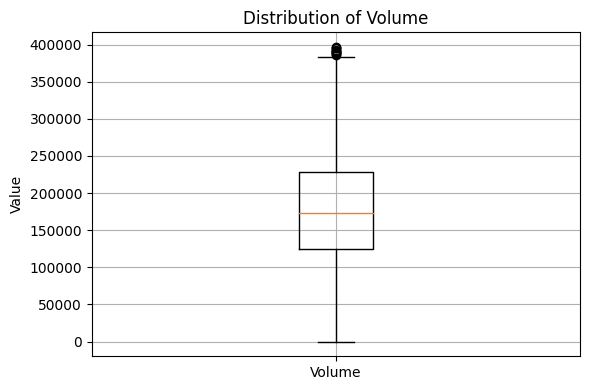

In [433]:
# Plot box plot for 'Volume' feature with logarithmic scaling
plt.figure(figsize=(6, 4))
plt.boxplot(df['Volume'])
plt.title('Distribution of Volume')
plt.ylabel('Value')
plt.xticks([1], ['Volume'])
plt.grid(True)
plt.tight_layout()
plt.show()

Before and after normalization

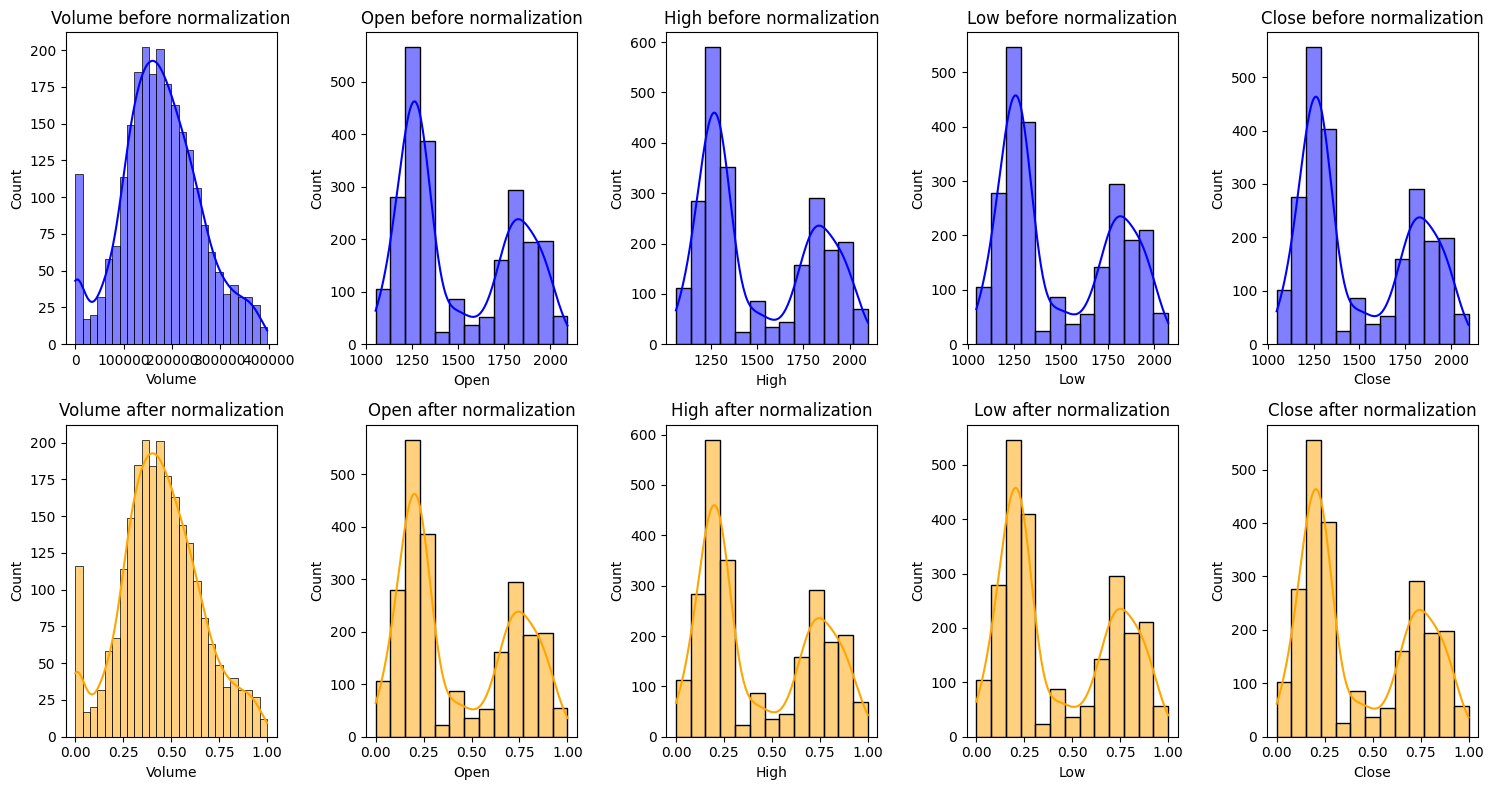

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['Volume', 'Open', 'High', 'Low', 'Close']

# Plot distributions before normalization
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_to_normalize):
    plt.subplot(2, len(columns_to_normalize), i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} before normalization')

# Fit the scaler on the selected columns and transform the data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Plot distributions after normalization
for i, col in enumerate(columns_to_normalize):
    plt.subplot(2, len(columns_to_normalize), len(columns_to_normalize) + i + 1)
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'{col} after normalization')

plt.tight_layout()
plt.show()


In [435]:
df.head(5)

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,0.938860,0.418693,0.935756,0.945630,0.949087
1,1,2024-01-18,0.931481,0.421050,0.918209,0.929889,0.934998
2,2,2024-01-17,0.917010,0.618150,0.939879,0.940029,0.931986
3,3,2024-01-16,0.939722,0.700844,0.960687,0.965814,0.954333
4,4,2024-01-12,0.960230,0.632651,0.941317,0.970159,0.959677


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2437 non-null   int64  
 1   Date        2437 non-null   object 
 2   Close       2437 non-null   float64
 3   Volume      2437 non-null   float64
 4   Open        2437 non-null   float64
 5   High        2437 non-null   float64
 6   Low         2437 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 216.9+ KB


In [437]:
df.isna().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

Correlation matrix

<ipython-input-438-3379cd56d408>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


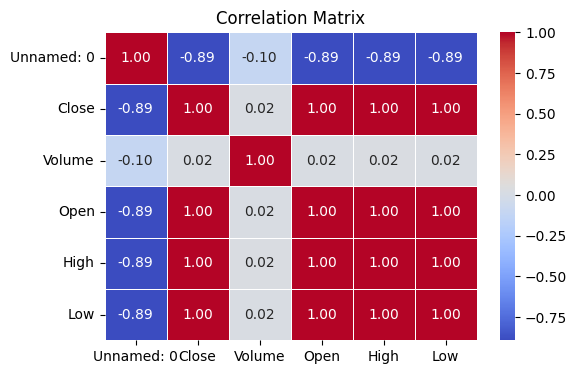

In [438]:

correlation_matrix = df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [439]:
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000
mean,1264.433730,0.429771,0.446168,0.427973,0.429438,0.430460
std,738.159278,0.288489,0.208776,0.288795,0.292957,0.290256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,615.000000,0.189554,0.315707,0.187458,0.185804,0.189759
50%,1276.000000,0.268232,0.435642,0.267811,0.265476,0.270307
75%,1907.000000,0.726018,0.576618,0.724806,0.727958,0.727458
max,2532.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [440]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sort the DataFrame by the date index in ascending order
df = df.sort_index(ascending=True)

# Print the DataFrame to verify the changes
print(df.head())


            Unnamed: 0     Close    Volume      Open      High       Low
Date                                                                    
2014-01-22        2532  0.181121  0.202344  0.181225  0.174602  0.184707
2014-01-23        2531  0.204025  0.105119  0.176048  0.197393  0.180140
2014-01-24        2530  0.205942  0.088230  0.204046  0.203283  0.205499
2014-01-27        2529  0.204983  0.159882  0.209416  0.209947  0.200738
2014-01-28        2528  0.192525  0.205279  0.195033  0.192371  0.196852


# **Findings:**


1.   The average opening price is very close to the average closing price, indicating that prices often don't change significantly throughout the day.

2.   The standard deviation of 729.26 indicates a significant spread in closing prices

3.   All columns have 2511 non-null values, indicating that there are no missing values in the data






# **1. Time Series Analysis: (for closing column)**

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot distribution of Gold price and trading volume

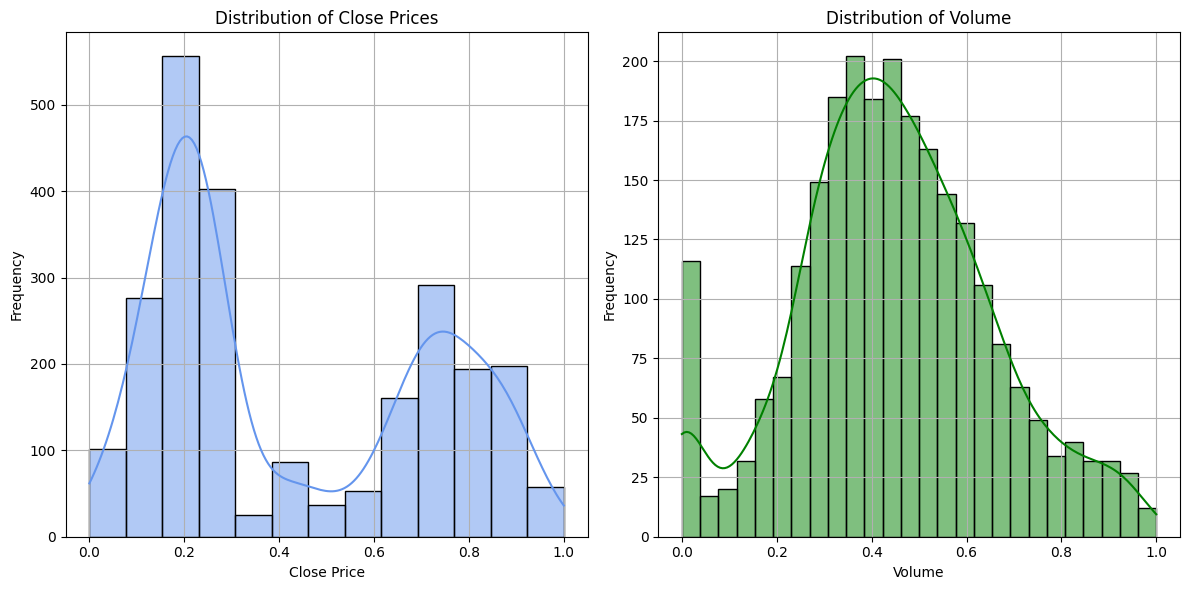

In [442]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], kde=True, color='#6495ED')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)

# Plot distribution of Volume
plt.subplot(1, 2, 2)
sns.histplot(df['Volume'], kde=True, color='green')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

Extract features from Date column

In [443]:
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day
#df.drop('Date')

 financial instrument over time, along with two different moving averages

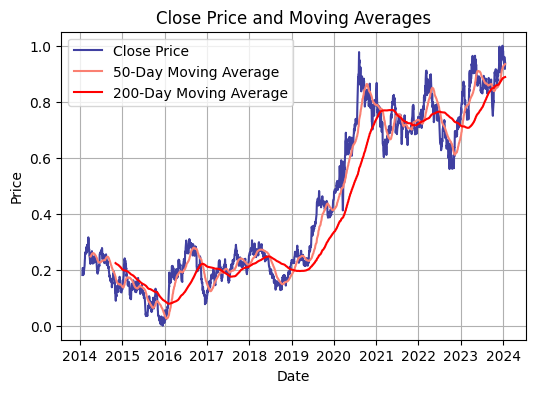

In [444]:
window_1 = 50
window_2 = 200
close_prices_ma_1 = df['Close'].rolling(window=window_1).mean()
close_prices_ma_2 = df['Close'].rolling(window=window_2).mean()

# Plot the prices and moving averages with different colors
plt.figure(figsize=(6, 4))
plt.plot(df.index, df['Close'], label="Close Price", color='#4040a1')
plt.plot(df.index, close_prices_ma_1, label="50-Day Moving Average", color='Salmon')
plt.plot(df.index, close_prices_ma_2, label="200-Day Moving Average", color='red')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Yearly analysis of gold price

<ipython-input-445-5227ef88079f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Close', data=df.groupby('Year')['Close'].mean().reset_index(), palette="husl")


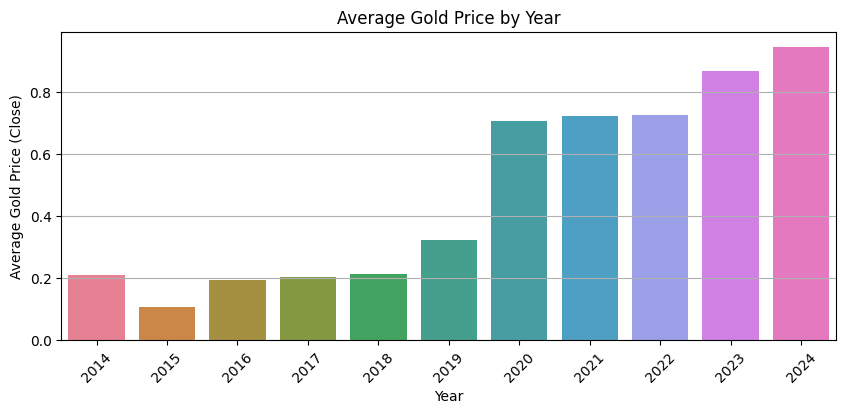

In [445]:
plt.figure(figsize=(10,4))
sns.barplot(x='Year', y='Close', data=df.groupby('Year')['Close'].mean().reset_index(), palette="husl")
plt.title('Average Gold Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Gold Price (Close)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

 This plot shows the average gold price (close) for each day of the month.

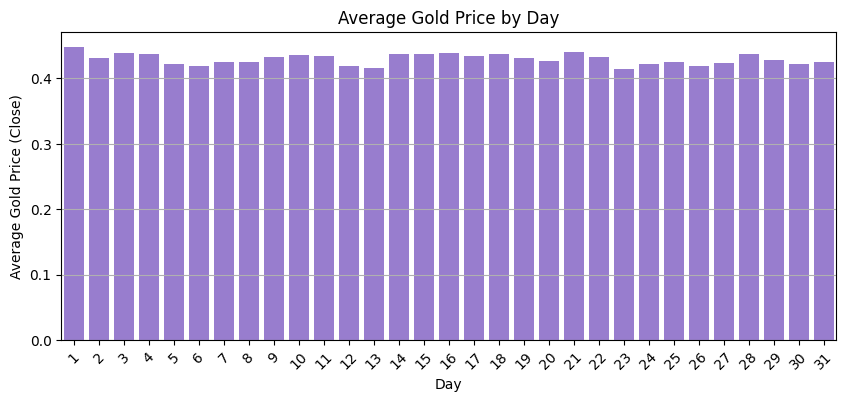

In [446]:
plt.figure(figsize=(10,4))
sns.barplot(x='Day', y='Close', data=df.groupby('Day')['Close'].mean().reset_index(), color='#9370DB')
plt.title('Average Gold Price by Day')
plt.xlabel('Day')
plt.ylabel('Average Gold Price (Close)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Monthly analysis of gold price by time

<ipython-input-447-1b781af8d8bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.index.month_name(), y=df['Close'], ax=ax, palette=custom_palette)


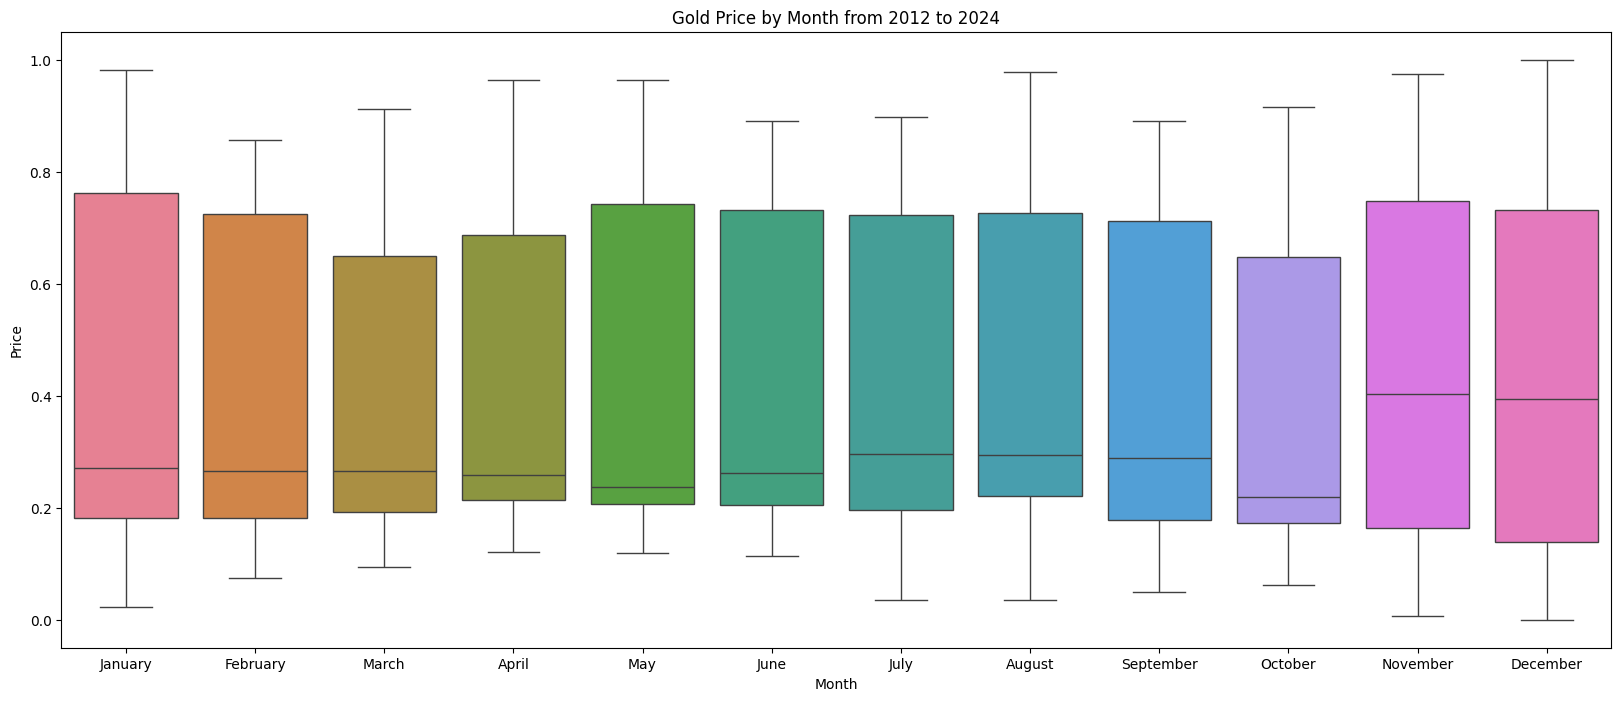

In [447]:
custom_palette = sns.color_palette("husl", 12)

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(), y=df['Close'], ax=ax, palette=custom_palette)
plt.title('Gold Price by Month from 2012 to 2024')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


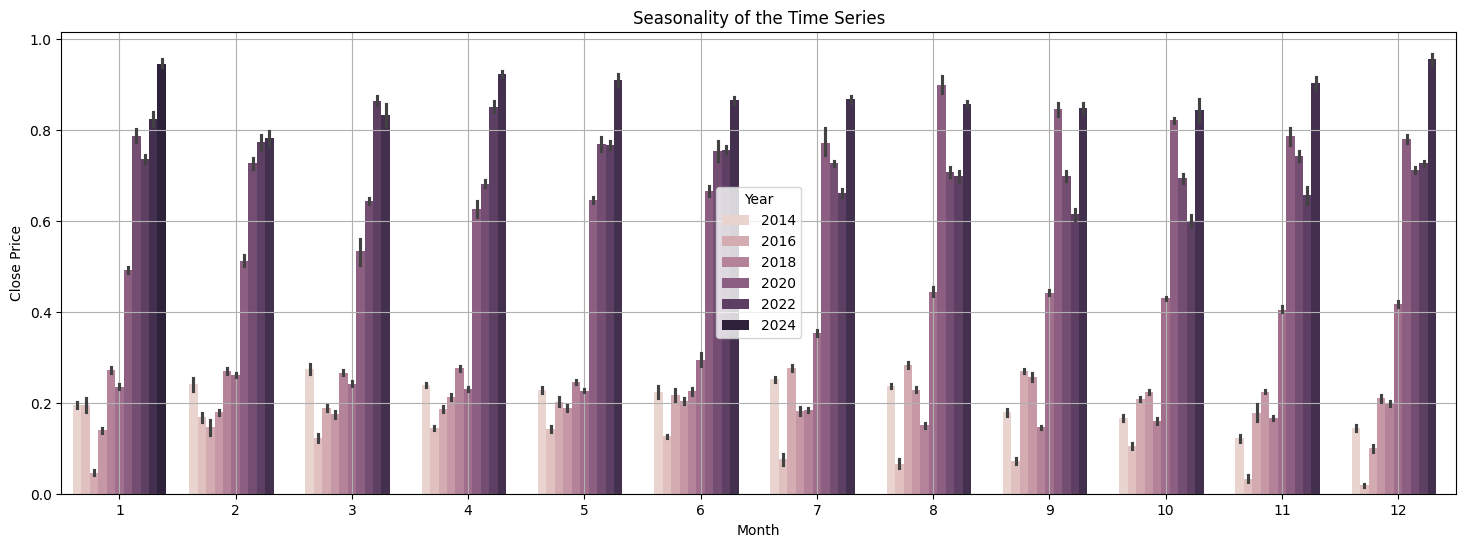

In [448]:
plt.figure(figsize=(18,6))
plt.title('Seasonality of the Time Series')

sns.barplot(x='Month', y='Close', hue='Year', data=df)

plt.xlabel('Month')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


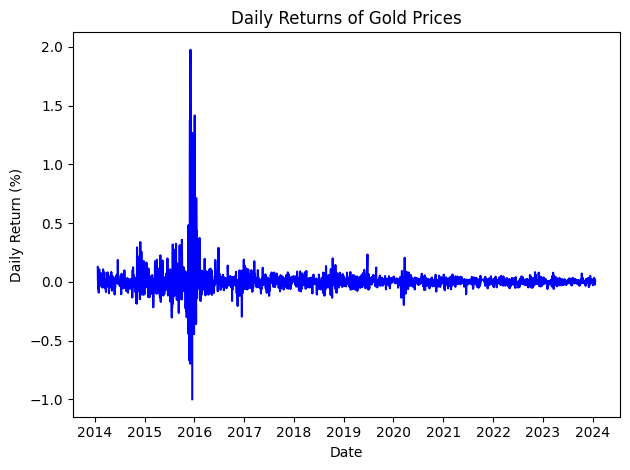

In [449]:
 # Calculate daily returns
daily_returns = df['Close'].pct_change()

# Plot the daily returns
plt.plot(daily_returns.index, daily_returns,color='blue')
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Daily Returns of Gold Prices")
plt.tight_layout()
plt.show()


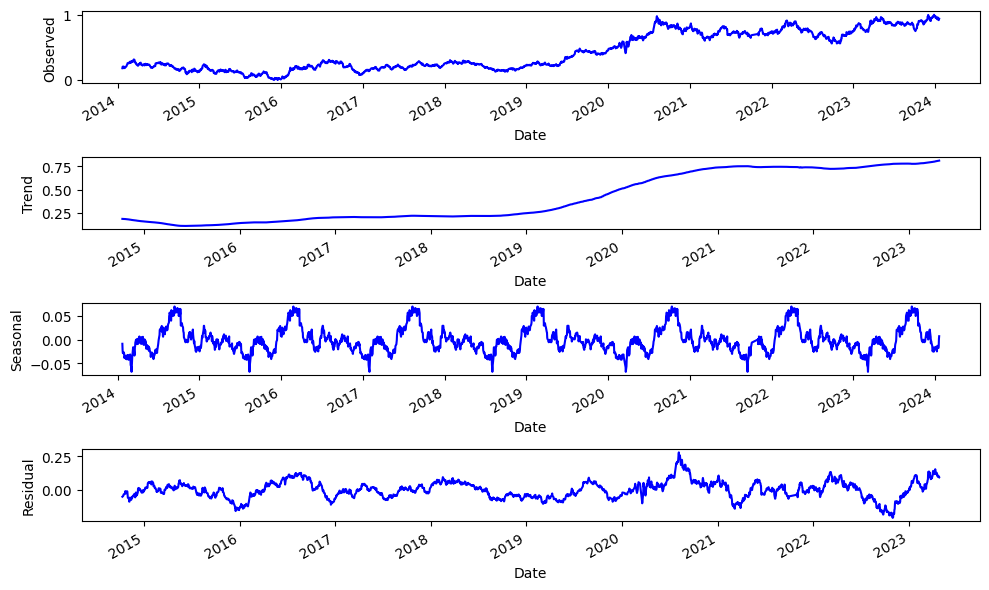

In [450]:
result = seasonal_decompose(df['Close'], model='additive', period=365)
fig, axes = plt.subplots(4, 1, figsize=(10, 6))

# Plot each component and set the color to blue
result.observed.plot(ax=axes[0], color='blue')
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1], color='blue')
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], color='blue')
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], color='blue')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


# **2- Advanced Modeling**

In [451]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.metrics import r2_score
from tensorflow.keras import regularizers


In [452]:

df=df.drop(['Unnamed: 0'],axis=1)
print(df.head())


               Close    Volume      Open      High       Low  Month  Year  Day
Date                                                                          
2014-01-22  0.181121  0.202344  0.181225  0.174602  0.184707      1  2014   22
2014-01-23  0.204025  0.105119  0.176048  0.197393  0.180140      1  2014   23
2014-01-24  0.205942  0.088230  0.204046  0.203283  0.205499      1  2014   24
2014-01-27  0.204983  0.159882  0.209416  0.209947  0.200738      1  2014   27
2014-01-28  0.192525  0.205279  0.195033  0.192371  0.196852      1  2014   28


# splitting data to train and test

In [453]:
split_index = pd.to_datetime('2022-01-01')

train = df[df.index <= split_index]
test = df[df.index > split_index]

X_train = train.drop(columns=['Close'])
y_train = train['Close']

X_test = test.drop(columns=['Close'])
y_test = test['Close']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')


Shape of X_train: (1929, 7)
Shape of y_train: (1929,)
Shape of X_test: (508, 7)
Shape of y_test: (508,)
Percentage of data in training set: 79.15 %
Percentage of data in testing set: 20.85 %


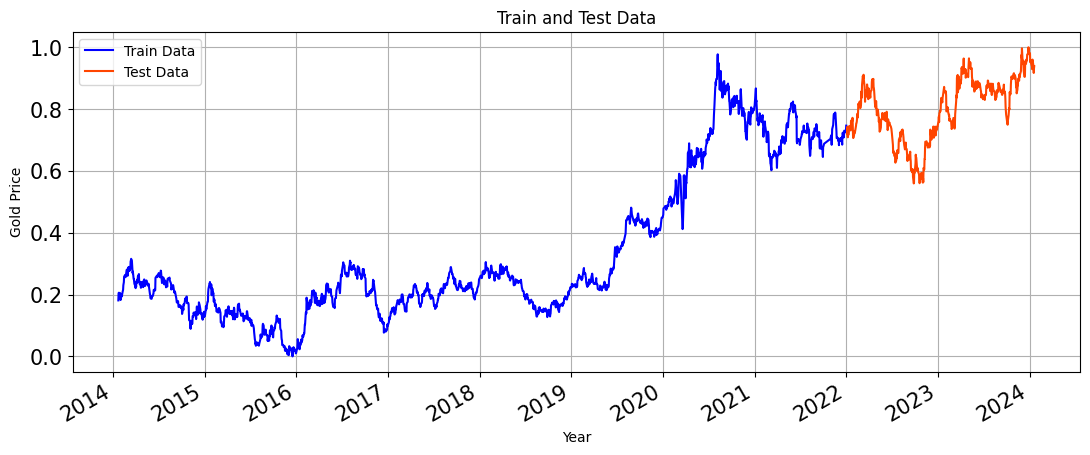

In [454]:
train['Close'].plot(figsize=(13,5), color='blue')
test['Close'].plot(figsize=(13,5), fontsize=15,color='OrangeRed')
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

# **Linear Regression model**

In [455]:


param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

linear_reg = LinearRegression()
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, cv=10, scoring='r2', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_linear_reg = grid_search.best_estimator_

y_pred = best_linear_reg.predict(X_test)



Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [456]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Evaluation Metrics:
Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Mean Squared Error (MSE): 4.2639867360428126e-05
Root Mean Squared Error (RMSE): 0.00652992093064136
Mean Absolute Error (MAE): 0.005159467789286433
R-squared (R2): 0.995905881785643


In [31]:
test_scores = grid_search.cv_results_['split0_test_score'], grid_search.cv_results_['split1_test_score'], grid_search.cv_results_['split2_test_score'], grid_search.cv_results_['split3_test_score'], grid_search.cv_results_['split4_test_score'], grid_search.cv_results_['split5_test_score'], grid_search.cv_results_['split6_test_score'], grid_search.cv_results_['split7_test_score'], grid_search.cv_results_['split8_test_score'], grid_search.cv_results_['split9_test_score']

# Print the cross-validation scores for all folds
print("Cross-validation scores for the Last Model:")
for i, scores in enumerate(zip(*test_scores)):
    print(f"CV {i + 1}: {scores}")



Cross-validation scores for the Last Model:
CV 1: (0.9838340741883447, 0.9765694511378007, 0.9934748068949113, 0.99346042970361, 0.9848438649412197, 0.994450899695442, 0.9943992425729173, 0.992033399984299, 0.9907657278872025, 0.970609463590033)
CV 2: (0.9876286389829033, 0.9846166900330708, 0.9953104533476099, 0.9945283860217865, 0.9872618208567364, 0.9961935985372975, 0.9958773682108001, 0.9954374842459496, 0.9919531086878016, 0.9732993018184664)
CV 3: (0.9838291574360771, 0.9764923880556023, 0.9934639195163804, 0.9934365544915299, 0.9848210555155789, 0.9945048264776066, 0.9944836742223573, 0.9920173375751897, 0.9907851304626153, 0.9707111869287189)
CV 4: (0.9875575533611534, 0.984542289102779, 0.9953070039344546, 0.9944946428955607, 0.9873326190504028, 0.9961859801367247, 0.9961093736239316, 0.9954120174981362, 0.9919380431003064, 0.9732245568515773)


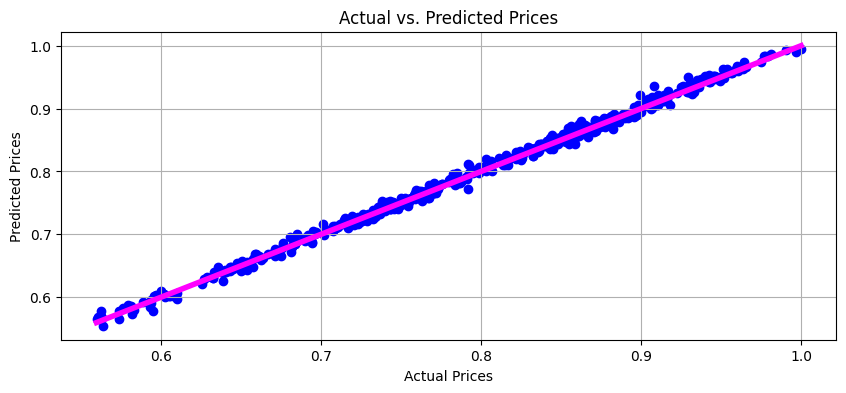

In [459]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4, color='Magenta')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

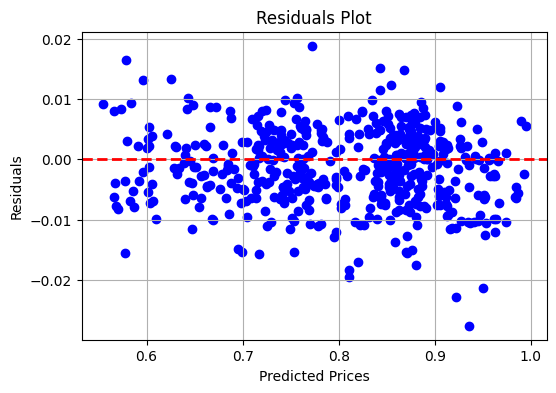

In [462]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


# **LSTM model**

In [463]:
def create_sequences(df, column_name, sequence_length):
    sequence_as_np = df[column_name].to_numpy()
    X = []
    y = []

    for i in range(len(sequence_as_np) - sequence_length):
        row = [[a] for a in sequence_as_np[i:i + sequence_length]]
        X.append(row)
        label = sequence_as_np[i + sequence_length]
        y.append(label)

    return np.array(X), np.array(y)

In [464]:


SEQUENCE_LENGTH = 30
X, y = create_sequences(df, 'Close', SEQUENCE_LENGTH)
X = X.reshape(X.shape[0], -1)
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))
input = 2250
X_train, y_train = X[:input], y[:input]
X_test, y_test = X[input:], y[input:]
X_train.shape, y_train.shape , X_test.shape, y_test.shape
X_train = X_train.reshape(X_train.shape[0], SEQUENCE_LENGTH, 1)
X_test = X_test.reshape(X_test.shape[0], SEQUENCE_LENGTH, 1)
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=False, input_shape=(SEQUENCE_LENGTH, 1)))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




In [465]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])
y_predlstm = model.predict(X_test)

y_predlstm = y_predlstm.reshape(-1, 1)

y_predlstm  = scaler.inverse_transform(y_predlstm )
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test, y_predlstm)
rmse = sqrt(mse)
r_squared = r2_score(y_test, y_predlstm)

print(f'Mean Squared Error on Test Set: {mse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')
print(f'R-squared on Test Set: {r_squared}')

Epoch 1/50
113/113 [==============================] - 5s 32ms/step - loss: 0.0111 - val_loss: 0.0018
Epoch 2/50
113/113 [==============================] - 4s 36ms/step - loss: 7.0829e-04 - val_loss: 0.0011
Epoch 3/50
113/113 [==============================] - 5s 40ms/step - loss: 6.4123e-04 - val_loss: 9.9947e-04
Epoch 4/50
113/113 [==============================] - 3s 24ms/step - loss: 5.3524e-04 - val_loss: 0.0012
Epoch 5/50
113/113 [==============================] - 2s 18ms/step - loss: 5.2810e-04 - val_loss: 9.8093e-04
Epoch 6/50
113/113 [==============================] - 2s 20ms/step - loss: 4.8953e-04 - val_loss: 0.0011
Epoch 7/50
113/113 [==============================] - 2s 18ms/step - loss: 4.4157e-04 - val_loss: 6.7540e-04
Epoch 8/50
113/113 [==============================] - 3s 24ms/step - loss: 3.7169e-04 - val_loss: 8.0869e-04
Epoch 9/50
113/113 [==============================] - 3s 25ms/step - loss: 3.9988e-04 - val_loss: 6.8482e-04
Epoch 10/50
113/113 [==================

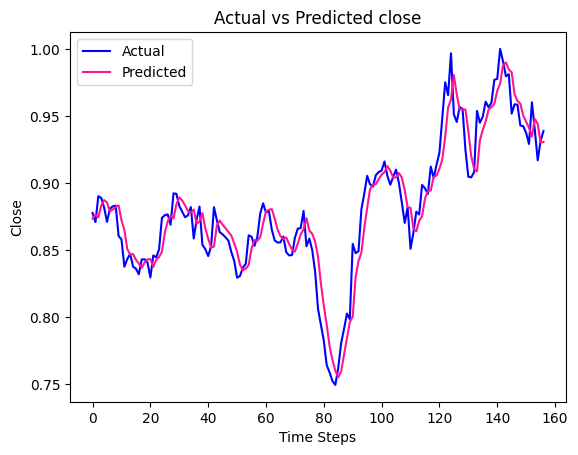

In [469]:
plt.plot(y_test, label='Actual',color='blue')
plt.plot(y_predlstm, label='Predicted',color='DeepPink')
plt.title('Actual vs Predicted close')
plt.xlabel('Time Steps')
plt.ylabel('Close')
plt.legend()
plt.show()

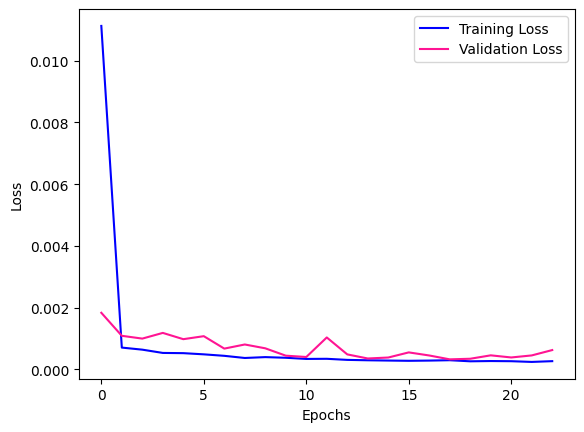

In [470]:
plt.plot(history.history['loss'], label='Training Loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss',color='DeepPink')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

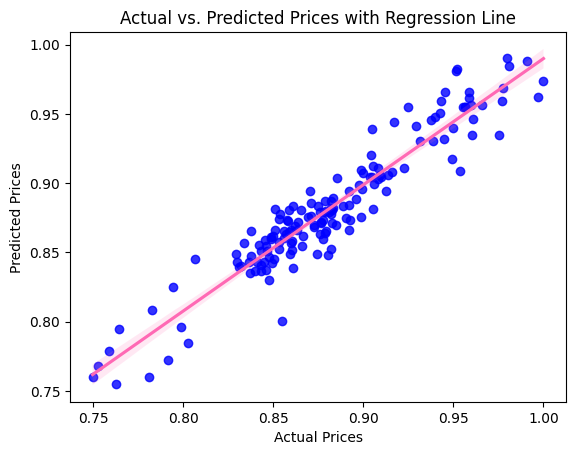

In [468]:
sns.regplot(x=y_test.flatten(), y=y_predlstm.flatten(), scatter_kws={'color': 'blue'}, line_kws={'color': 'hotpink'})
plt.title('Actual vs. Predicted Prices with Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **3- Trading Strategy Development**

simple trading strategy based on Bollinger Bands and backtests its performance on historical closing prices

<ipython-input-34-9238a27e66ff>:52: RuntimeWarning: invalid value encountered in divide
  daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]


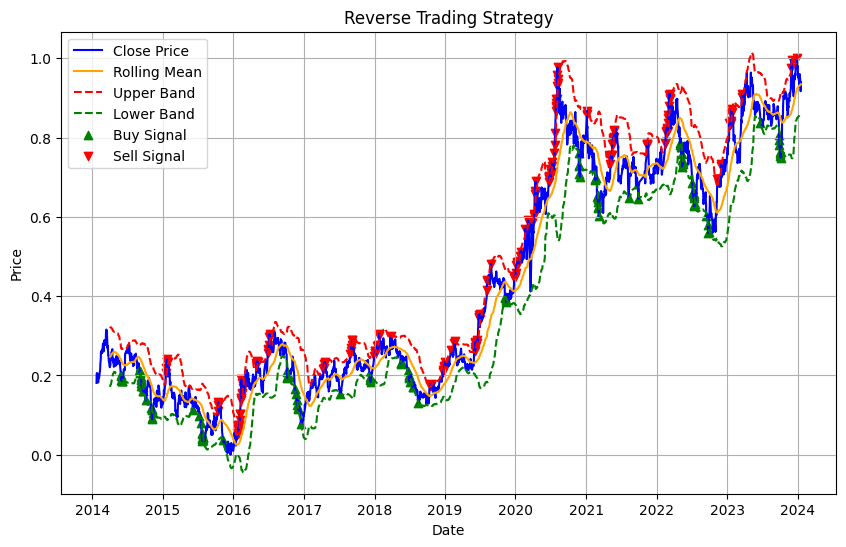

In [34]:

lookback_period = 50
entry_threshold = 2.0
exit_threshold = 0.0

df['RollingMean'] = df['Close'].rolling(window=lookback_period).mean()
df['RollingStd'] = df['Close'].rolling(window=lookback_period).std()

# Calculate upper and lower bands for entry and exit
df['UpperBand'] = df['RollingMean'] + entry_threshold * df['RollingStd']
df['LowerBand'] = df['RollingMean'] - entry_threshold * df['RollingStd']
exit_band = df['RollingMean'] + exit_threshold * df['RollingStd']

# Initialize trading signals
df['Signal'] = 0

# Generate trading signals
for i in range(lookback_period, len(df)):
    if df['Close'].iloc[i] > df['UpperBand'].iloc[i]:
        df.at[df.index[i], 'Signal'] = -1  # Sell signal (price above upper band)
    elif df['Close'].iloc[i] < df['LowerBand'].iloc[i]:
        df.at[df.index[i], 'Signal'] = 1  # Buy signal (price below lower band)
    elif df['Close'].iloc[i] > exit_band.iloc[i]:
        df.at[df.index[i], 'Signal'] = 0  # Exit signal (price above exit band)
    elif df['Close'].iloc[i] < exit_band.iloc[i]:
        df.at[df.index[i], 'Signal'] = 0  # Exit signal (price below exit band)

# Backtesting
initial_capital = 100000  # Initial capital in dollars
position = 0  # Initial position
cash = initial_capital  # Initial cash
portfolio_value = []  # Portfolio value over time

for i in range(lookback_period, len(df)):
    if df['Signal'].iloc[i] == 1:
        # Enter long position
        position = cash / df['Close'].iloc[i]  # Invest all available cash
        cash = 0  # No remaining cash after buying
    elif df['Signal'].iloc[i] == -1:
        # Enter short position
        cash += position * df['Close'].iloc[i]  # Sell all owned assets
        position = 0  # No remaining position after selling
    elif df['Signal'].iloc[i] == 0:
        # Exit position
        cash += position * df['Close'].iloc[i]  # Sell all owned assets
        position = 0  # No remaining position after selling

    # Calculate portfolio value
    portfolio_value.append(cash + position * df['Close'].iloc[i])

# Calculate performance metrics
total_return = (portfolio_value[-1] - initial_capital) / initial_capital
daily_returns = np.diff(portfolio_value) / portfolio_value[:-1]
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year
max_drawdown = np.max(np.maximum.accumulate(portfolio_value) - portfolio_value) / initial_capital

# Plotting
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['RollingMean'], label='Rolling Mean', color='orange')
plt.plot(df.index, df['UpperBand'], label='Upper Band', color='red', linestyle='--')
plt.plot(df.index, df['LowerBand'], label='Lower Band', color='green', linestyle='--')

# Filter 'Close' prices for buy and sell signals
buy_indices = df[df['Signal'] == 1].index
sell_indices = df[df['Signal'] == -1].index
buy_prices = df.loc[df['Signal'] == 1, 'Close']
sell_prices = df.loc[df['Signal'] == -1, 'Close']

# Plot buy and sell signals
plt.scatter(buy_indices, buy_prices, label='Buy Signal', marker='^', color='green')
plt.scatter(sell_indices, sell_prices, label='Sell Signal', marker='v', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Reverse Trading Strategy')
plt.legend()
plt.grid(True)
plt.show()



In [35]:
# Count the number of buy and sell signals
total_trades = len(df[df['Signal'] != 0])

# Count the number of successful buy and sell signals
successful_buy_trades = len(df[(df['Signal'] == 1) & (df['Close'] < df['UpperBand'])])
successful_sell_trades = len(df[(df['Signal'] == -1) & (df['Close'] > df['LowerBand'])])

# Calculate win rates
buy_win_rate = successful_buy_trades / total_trades
sell_win_rate = successful_sell_trades / total_trades

# Print win rates
print("Buy Win Rate:", buy_win_rate)
print("Sell Win Rate:", sell_win_rate)



Buy Win Rate: 0.3888888888888889
Sell Win Rate: 0.6111111111111112


# **4- Market Sentiment Analysis**

# market sentiment

Reading the market news dataset

In [551]:
df1=pd.read_csv("/content/gold-dataset-sinha-khandait.csv")


In [552]:
df1.head(2)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative


In [482]:
df1.drop_duplicates(subset=['Dates'], inplace=True)


In [483]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     3761 non-null   object
 1   URL                       3761 non-null   object
 2   News                      3761 non-null   object
 3   Price Direction Up        3761 non-null   int64 
 4   Price Direction Constant  3761 non-null   int64 
 5   Price Direction Down      3761 non-null   int64 
 6   Asset Comparision         3761 non-null   int64 
 7   Past Information          3761 non-null   int64 
 8   Future Information        3761 non-null   int64 
 9   Price Sentiment           3761 non-null   object
dtypes: int64(6), object(4)
memory usage: 323.2+ KB


Converting dates column to datetime format

In [484]:

df1['Dates'] = pd.to_datetime(df1['Dates'], format='%d-%m-%Y', errors='coerce')

unique_dates = df1['Dates'].dt.strftime('%d-%m-%Y').unique()

print("Unique dates:", unique_dates)
df1.head(2)

Unique dates: ['28-01-2016' '13-09-2017' '26-07-2016' ... '05-11-2009' '11-06-2002'
 '01-10-2007']


,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative


In [487]:
df1.info()
df1.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Dates                     3672 non-null   datetime64[ns]
 1   URL                       3672 non-null   object        
 2   News                      3672 non-null   object        
 3   Price Direction Up        3672 non-null   int64         
 4   Price Direction Constant  3672 non-null   int64         
 5   Price Direction Down      3672 non-null   int64         
 6   Asset Comparision         3672 non-null   int64         
 7   Past Information          3672 non-null   int64         
 8   Future Information        3672 non-null   int64         
 9   Price Sentiment           3672 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 315.6+ KB


Merging both datasets with common dates

In [488]:
merged_df = pd.merge(df1, df, how='inner', left_on='Dates', right_on='Date')

# Display the merged dataframe
merged_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment,Close,Volume,Open,High,Low,Month,Year,Day
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,0.063728,0.368256,0.061559,0.061516,0.062962,1,2016,28
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,0.266794,0.751339,0.272989,0.268276,0.271182,9,2017,13
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,0.259895,0.223511,0.253140,0.252728,0.260591,7,2016,26
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,0.257115,0.633451,0.256400,0.252052,0.263603,2,2018,28
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,0.277336,0.750071,0.281427,0.275229,0.282744,9,2017,6


In [489]:
merged_df.shape

(1153, 18)

In [494]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1152
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Dates                     1153 non-null   datetime64[ns]
 1   URL                       1153 non-null   object        
 2   News                      1153 non-null   object        
 3   Price Direction Up        1153 non-null   int64         
 4   Price Direction Constant  1153 non-null   int64         
 5   Price Direction Down      1153 non-null   int64         
 6   Asset Comparision         1153 non-null   int64         
 7   Past Information          1153 non-null   int64         
 8   Future Information        1153 non-null   int64         
 9   Price Sentiment           1153 non-null   object        
 10  Close                     1153 non-null   float64       
 11  Volume                    1153 non-null   float64       
 12  Open                

One hot encoding

In [496]:
merged_df= pd.get_dummies(merged_df, columns=['Price Sentiment'])

In [497]:
merged_df.head()

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Close,...,Open,High,Low,Month,Year,Day,Price Sentiment_negative,Price Sentiment_neutral,Price Sentiment_none,Price Sentiment_positive
0,2016-01-28,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,0.063728,...,0.061559,0.061516,0.062962,1,2016,28,1,0,0,0
1,2017-09-13,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,0.266794,...,0.272989,0.268276,0.271182,9,2017,13,1,0,0,0
2,2016-07-26,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,0.259895,...,0.253140,0.252728,0.260591,7,2016,26,0,0,0,1
3,2018-02-28,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,0.257115,...,0.256400,0.252052,0.263603,2,2018,28,0,0,1,0
4,2017-09-06,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,0.277336,...,0.281427,0.275229,0.282744,9,2017,6,1,0,0,0


# Analysis

In [535]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
from textblob import TextBlob
from datetime import datetime
import numpy as np
from scipy import stats
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


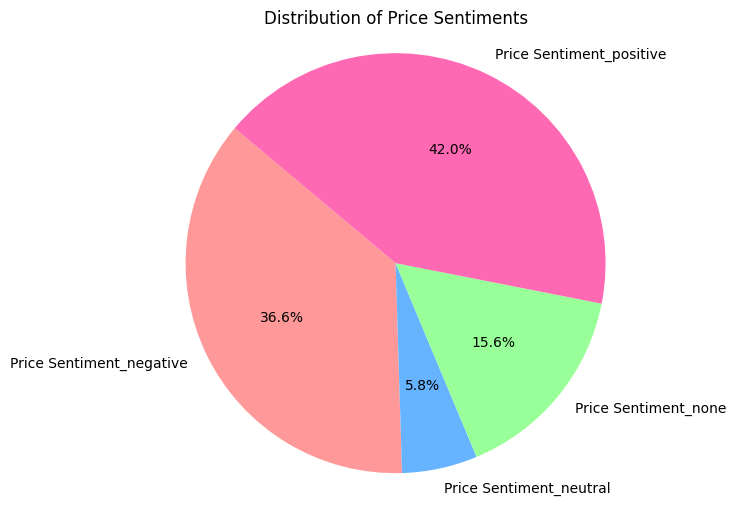

In [505]:
# Calculate the counts for each sentiment category
sentiment_counts = merged_df[['Price Sentiment_negative', 'Price Sentiment_neutral', 'Price Sentiment_none', 'Price Sentiment_positive']].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#FF69B4'])
plt.title('Distribution of Price Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


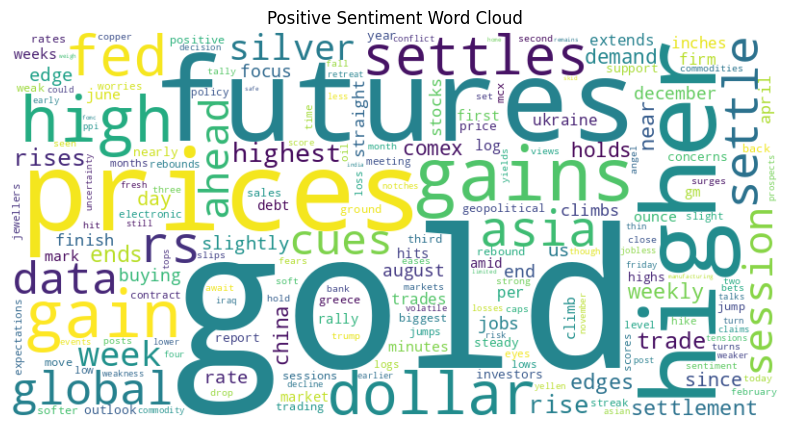

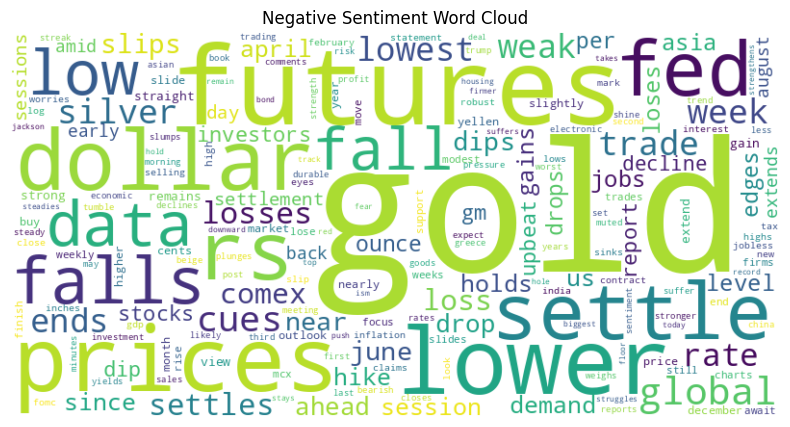

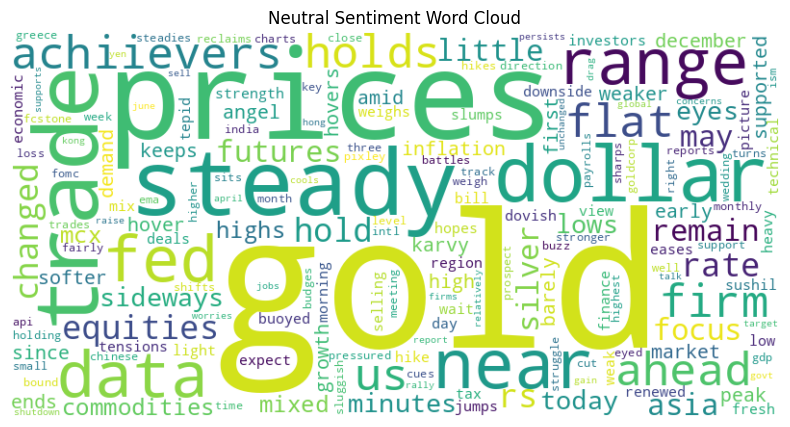

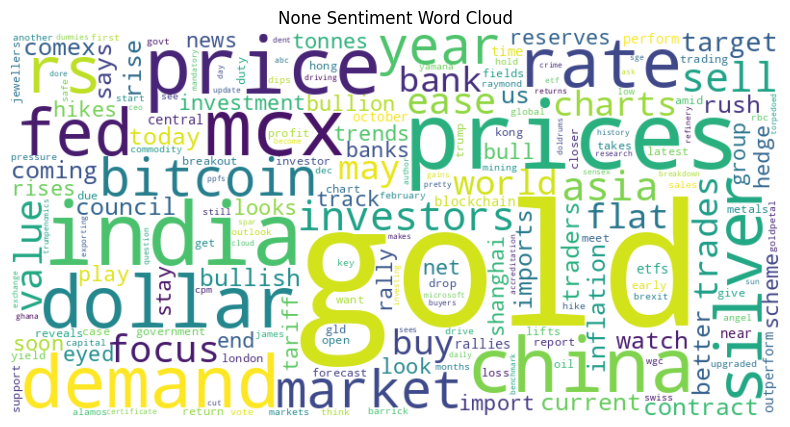

In [504]:
# Step 1: Separate dataset into subsets based on sentiment categories
positive_news = merged_df[merged_df['Price Sentiment_positive'] == 1]['News']
negative_news = merged_df[merged_df['Price Sentiment_negative'] == 1]['News']
neutral_news = merged_df[merged_df['Price Sentiment_neutral'] == 1]['News']
none_news = merged_df[merged_df['Price Sentiment_none'] == 1]['News']

# Step 2: Preprocess the textual data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Step 3: Calculate word frequencies for each sentiment category
positive_words = [word for news in positive_news for word in preprocess_text(news)]
negative_words = [word for news in negative_news for word in preprocess_text(news)]
neutral_words = [word for news in neutral_news for word in preprocess_text(news)]
none_words = [word for news in none_news for word in preprocess_text(news)]

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)
neutral_word_freq = Counter(neutral_words)
none_word_freq = Counter(none_words)

# Step 4: Generate word clouds
def generate_word_cloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 5: Visualize word clouds for positive sentiment
generate_word_cloud(positive_word_freq, 'Positive Sentiment Word Cloud')

# Visualize word clouds for negative sentiment
generate_word_cloud(negative_word_freq, 'Negative Sentiment Word Cloud')

# Visualize word clouds for neutral sentiment
generate_word_cloud(neutral_word_freq, 'Neutral Sentiment Word Cloud')

# Visualize word clouds for none sentiment
generate_word_cloud(none_word_freq, 'None Sentiment Word Cloud')


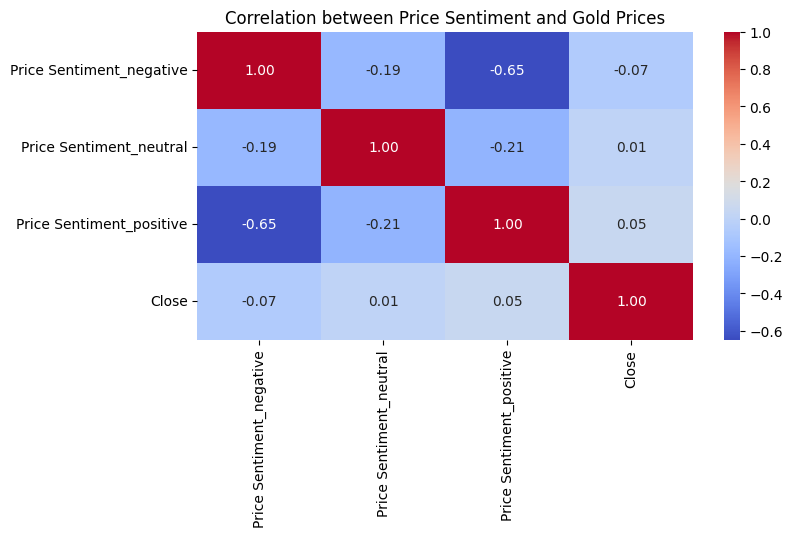

In [508]:

sentiment_price_corr = merged_df[['Price Sentiment_negative', 'Price Sentiment_neutral', 'Price Sentiment_positive', 'Close']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(sentiment_price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price Sentiment and Gold Prices")
plt.show()

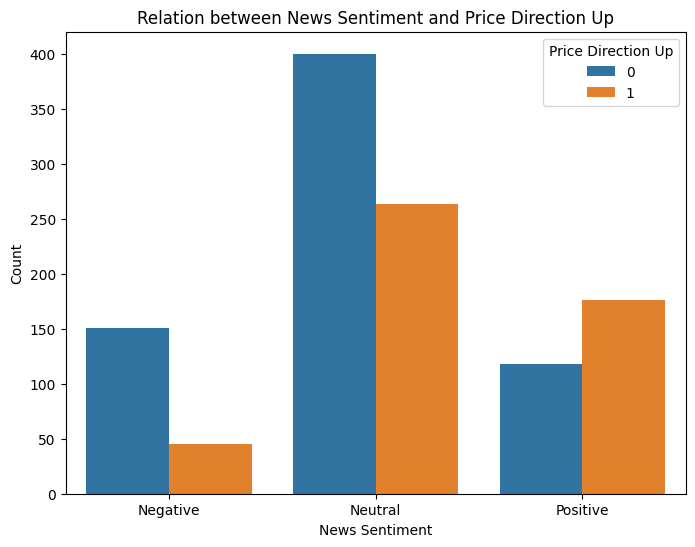

In [509]:


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# 2. Apply this function to create a new column representing the sentiment
merged_df['News Sentiment'] = merged_df['News'].apply(get_sentiment)

# 3. Visualize the relationship between the sentiment of the news and the price direction
plt.figure(figsize=(8, 6))
sns.countplot(x='News Sentiment', hue='Price Direction Up', data=merged_df)
plt.title('Relation between News Sentiment and Price Direction Up')
plt.xlabel('News Sentiment')
plt.ylabel('Count')
plt.legend(title='Price Direction Up', loc='upper right')
plt.show()



# the impact of market events on gold prices.

Reading the economic data and events

In [553]:
df2=pd.read_csv("/content/economic_calendar_19_24.csv")
df2.head(2)

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast
0,Tuesday,01/01/19,20:45,CN,Caixin Manufacturing PMI DEC,49.7,50.2,50.1,50.1
1,Friday,01/04/19,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K


Reading the gold price data

In [554]:
df3=pd.read_csv("/content/gold_price_19_24.csv")
df3.head(2)

,Date,Price,Open,High,Low,Vol_K,Change_percent
0,12/01/2023,2089.7,2056.5,2095.7,2052.6,241.62,1.58
1,11/30/2023,2057.2,2065.4,2067.4,2051.2,151.92,-0.48


Merge both datasets

In [555]:

df3['Date'] = pd.to_datetime(df3['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the datasets on the 'Date' column
merged_df = pd.merge(df2, df3, on='Date', how='inner')


In [556]:
merged_df.isna().sum()

Day                 0
Date                0
Hour               34
Country             0
Event               0
Actual            145
Previous          146
Consensus         339
Forecast          149
Price               0
Open                0
High                0
Low                 0
Vol_K               3
Change_percent      0
dtype: int64

In [524]:
print("before dropping nans",merged_df.shape)
merged_df.dropna(inplace=True)
print("after dropping nans",merged_df.shape)

before dropping nans (1773, 15)
after dropping nans (1430, 15)


In [525]:
merged_df.head()

,Day,Date,Hour,Country,Event,Actual,Previous,Consensus,Forecast,Price,Open,High,Low,Vol_K,Change_percent
0,Friday,2019-01-04,8:30,US,Non Farm Payrolls DEC,312K,176K,177K,165K,1285.8,1298.9,1300.0,1278.1,316.06,-0.70
1,Monday,2019-01-07,10:00,CA,Ivey PMI s.a DEC,59.7,57.2,56.8,56.7,1289.9,1290.2,1297.0,1287.3,204.68,0.32
4,Tuesday,2019-01-08,5:00,EA,Business Confidence DEC,0.82,1.04,0.99,1.1,1285.9,1287.4,1288.4,1280.2,221.92,-0.31
6,Wednesday,2019-01-09,20:30,CN,Inflation Rate YoY DEC,0.019,2.20%,0.021,0.022,1292.0,1287.0,1295.0,1280.9,245.97,0.47
8,Friday,2019-01-11,8:30,US,Core Inflation Rate YoY DEC,0.022,2.20%,0.022,0.022,1289.5,1290.2,1295.7,1287.2,210.64,0.16


In [526]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day             1430 non-null   object        
 1   Date            1430 non-null   datetime64[ns]
 2   Hour            1430 non-null   object        
 3   Country         1430 non-null   object        
 4   Event           1430 non-null   object        
 5   Actual          1430 non-null   object        
 6   Previous        1430 non-null   object        
 7   Consensus       1430 non-null   object        
 8   Forecast        1430 non-null   object        
 9   Price           1430 non-null   float64       
 10  Open            1430 non-null   float64       
 11  High            1430 non-null   float64       
 12  Low             1430 non-null   float64       
 13  Vol_K           1430 non-null   float64       
 14  Change_percent  1430 non-null   float64       
dtypes: d

The two peaks are
Event: Unemployment Rate NOV, Price: 2089.7
Event: ISM Manufacturing PMI NOV, Price: 2089.7


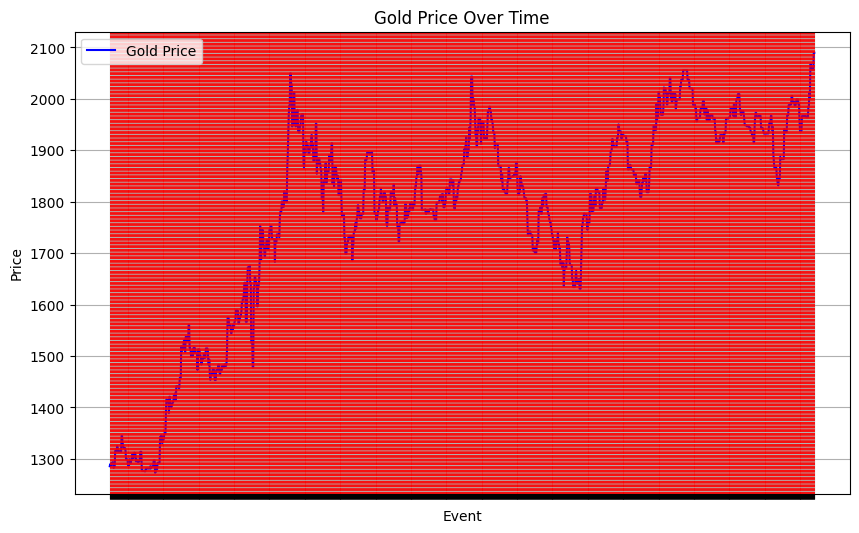

In [529]:

# Plot gold prices over time
plt.figure(figsize=(10, 6))
plt.plot(range(len(merged_df)), merged_df['Price'], color='blue', label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Event')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# Overlay market events on the plot
event_labels = merged_df[merged_df['Event'].notna()]['Event']
for i, _ in enumerate(event_labels):
    plt.axvline(x=i, color='red', linestyle='--', linewidth=0.5)

# Find the rows where the price is maximum
max_price_rows = merged_df.loc[merged_df['Price'] == merged_df['Price'].max()]

print("The two peaks are")
for index, row in max_price_rows.iterrows():
    print(f"Event: {row['Event']}, Price: {row['Price']}")

plt.xticks(range(len(merged_df)), [])
plt.show()


In [536]:
merged_df.drop(['Day', 'Date', 'Hour', 'Country', 'Actual', 'Previous', 'Consensus', 'Forecast', 'Open','High', 'Low', 'Vol_K', 'Change_percent'], axis=1, inplace=True)


In [537]:
unique_column_names = merged_df.columns.unique()
print(unique_column_names)


Index(['Event', 'Price'], dtype='object')


In [538]:
unique_values = merged_df['Event'].unique()
print(f"Unique values for: ",unique_values)

Unique values for:  ['Non Farm Payrolls\xa0DEC' 'Ivey PMI s.a\xa0DEC'
 'Business Confidence\xa0DEC' 'Inflation Rate YoY\xa0DEC'
 'Core Inflation Rate YoY\xa0DEC' 'Claimant Count Change\xa0DEC'
 'Balance of Trade\xa0DEC' 'Consumer Confidence\xa0JAN'
 'Business Confidence\xa0JAN' 'Gfk Consumer Confidence\xa0JAN'
 'NBS Manufacturing PMI\xa0JAN' 'Caixin Manufacturing PMI\xa0JAN'
 'Non Farm Payrolls\xa0JAN' 'Balance of Trade\xa0NOV'
 'Ivey PMI s.a\xa0JAN' 'Inflation Rate YoY\xa0JAN'
 'Core Inflation Rate YoY\xa0JAN' 'Retail Sales MoM\xa0DEC'
 'Claimant Count Change\xa0JAN' 'Balance of Trade\xa0JAN'
 'Durable Goods Orders MoM\xa0DEC' 'Business Confidence\xa0FEB'
 'Gfk Consumer Confidence\xa0FEB' 'NBS Manufacturing PMI\xa0FEB'
 'Caixin Manufacturing PMI\xa0FEB' 'Consumer Confidence\xa0FEB'
 'Personal Income MoM\xa0DEC' 'Personal Income MoM\xa0JAN'
 'Personal Spending MoM\xa0DEC' 'Ivey PMI s.a\xa0FEB'
 'Non Farm Payrolls\xa0FEB' 'Inflation Rate YoY\xa0FEB'
 'Retail Sales MoM\xa0JAN' 'Core Infl

In [539]:

event_column = 'Event'

def extract_main_event_name(event):
    parts = event.split('\xa0')
    main_event_name = parts[0]
    return main_event_name

new_df = merged_df.copy()
new_df[event_column] = new_df[event_column].apply(extract_main_event_name)

# Save the new DataFrame to a file
new_df.to_csv('new_merged_df.csv', index=False)


In [540]:
new_df=pd.read_csv("/content/new_merged_df.csv")
event_stats = new_df.groupby('Event').agg({'Price': ['count', 'mean']})

event_stats.columns = ['Frequency', 'Average Price']

event_stats.reset_index(inplace=True)

event_stats.sort_values(by='Frequency', ascending=False, inplace=True)

print(event_stats)


                                    Event  Frequency  Average Price
40                     Inflation Rate YoY        250    1725.981600
0                        Balance of Trade        174    1746.772414
57                       Retail Sales MoM         84    1773.871429
56                  Personal Spending MoM         59    1744.384746
55                    Personal Income MoM         59    1744.684746
..                                    ...        ...            ...
30                                GDP YoY          2    1813.450000
61  S&P Global/CIPS UK Services PMI Flash          2    1899.850000
3                 BoE Quantitative Easing          1    1798.200000
33          Gfk Consumer Confidence Final          1    1727.400000
23              GDP Growth Rate QoQ Final          1    1878.600000

[64 rows x 3 columns]


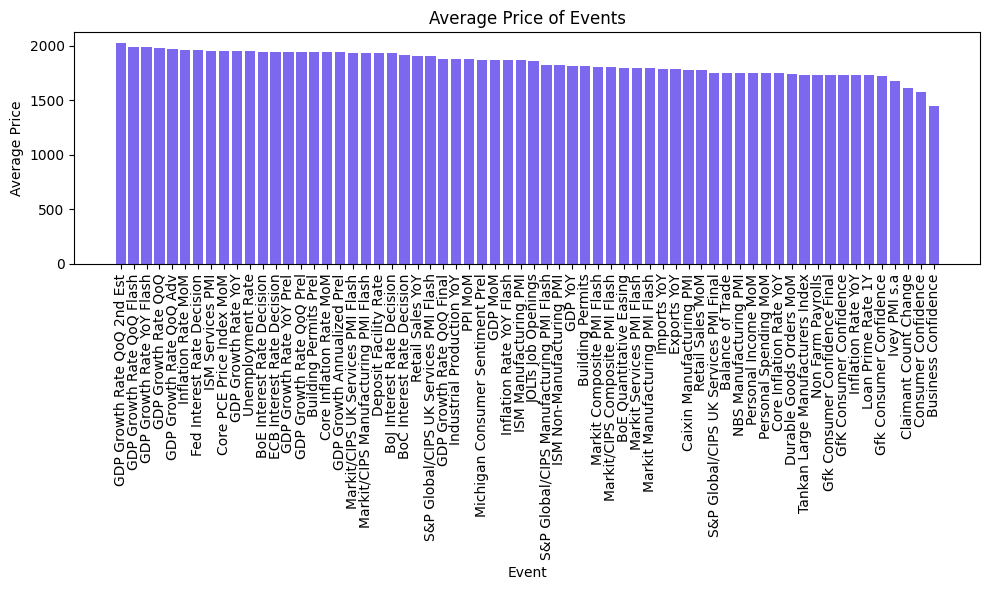

In [541]:
event_stats_sorted = event_stats.sort_values(by='Average Price', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(event_stats_sorted['Event'], event_stats_sorted['Average Price'], color='MediumSlateBlue')
plt.xlabel('Event')
plt.ylabel('Average Price')
plt.title('Average Price of Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

correlations with inflamation event using linear regression analysis

In [547]:

inflation_df = new_df[new_df['Event'].str.contains('Inflation Rate YoY')]

# Extracting the required columns
price = pd.to_numeric(inflation_df['Price'], errors='coerce')


In [548]:
inflation_df.head()

,Event,Price
3,Inflation Rate YoY,1292.0
4,Core Inflation Rate YoY,1289.5
5,Inflation Rate YoY,1289.5
6,Inflation Rate YoY,1293.8
7,Inflation Rate YoY,1292.3


In [544]:

inflation_df = new_df[new_df['Event'].str.contains('Inflation Rate YoY')]
price = pd.to_numeric(inflation_df['Price'], errors='coerce')

# Ridge Regression
ridge_model = Ridge(alpha=2.5)
ridge_cv_scores = cross_val_score(ridge_model, price.values.reshape(-1, 1), price, cv=5, scoring='r2')

print("Ridge Regression Cross-Validation R-squared scores:", ridge_cv_scores)
print("Ridge Regression Mean R-squared:", np.mean(ridge_cv_scores))

# Lasso Regression
lasso_model = Lasso(alpha=2.0)
lasso_cv_scores = cross_val_score(lasso_model, price.values.reshape(-1, 1), price, cv=5, scoring='r2')

# Print the cross-validation scores for Lasso Regression
print("Lasso Regression Cross-Validation R-squared scores:", lasso_cv_scores)
print("Lasso Regression Mean R-squared:", np.mean(lasso_cv_scores))


Ridge Regression Cross-Validation R-squared scores: [1. 1. 1. 1. 1.]
Ridge Regression Mean R-squared: 0.9999999999978139
Lasso Regression Cross-Validation R-squared scores: [0.99999956 1.         0.99999999 1.         0.99999994]
Lasso Regression Mean R-squared: 0.9999998995088764


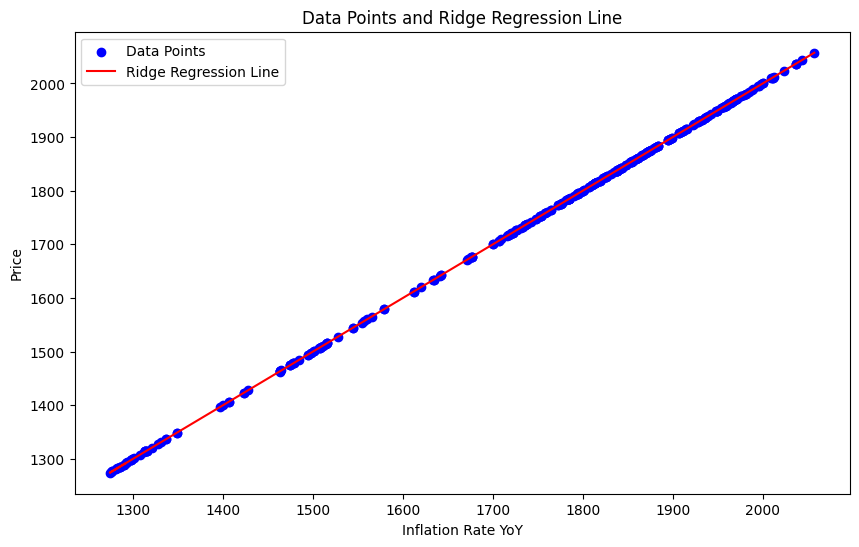

In [546]:
ridge_model = Ridge(alpha=2.5)
ridge_model.fit(price.values.reshape(-1, 1), price)
predicted_prices = ridge_model.predict(price.values.reshape(-1, 1))

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(price, price, color='blue', label='Data Points')
plt.plot(price, predicted_prices, color='red', label='Ridge Regression Line')
plt.xlabel('Inflation Rate YoY')
plt.ylabel('Price')
plt.title('Data Points and Ridge Regression Line')
plt.legend()
plt.show()

In [560]:
new_df.head()

,Event,Price
0,Non Farm Payrolls,1285.8
1,Ivey PMI s.a,1289.9
2,Business Confidence,1285.9
3,Inflation Rate YoY,1292.0
4,Core Inflation Rate YoY,1289.5


Statistical tests and analyses to gain insights into the characteristics of gold price movements.

In [561]:
from scipy import stats

# Split the DataFrame into two periods: before and after 2020
period1 = merged_df[merged_df['Date'] < '2020-01-01']
period2 = merged_df[merged_df['Date'] >= '2020-01-01']

# Extract gold prices for each period
group1 = period1['Price']
group2 = period2['Price']

# Perform a t-test for independent samples
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Set the significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean gold prices between the two periods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean gold prices between the two periods.")


T-statistic: -60.57517615569674
P-value: 0.0
Reject the null hypothesis: There is a significant difference in the mean gold prices between the two periods.


<ipython-input-562-680e53282820>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(period1['Price'], label='Before 2020', shade=True)
<ipython-input-562-680e53282820>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(period2['Price'], label='After 2020', shade=True)


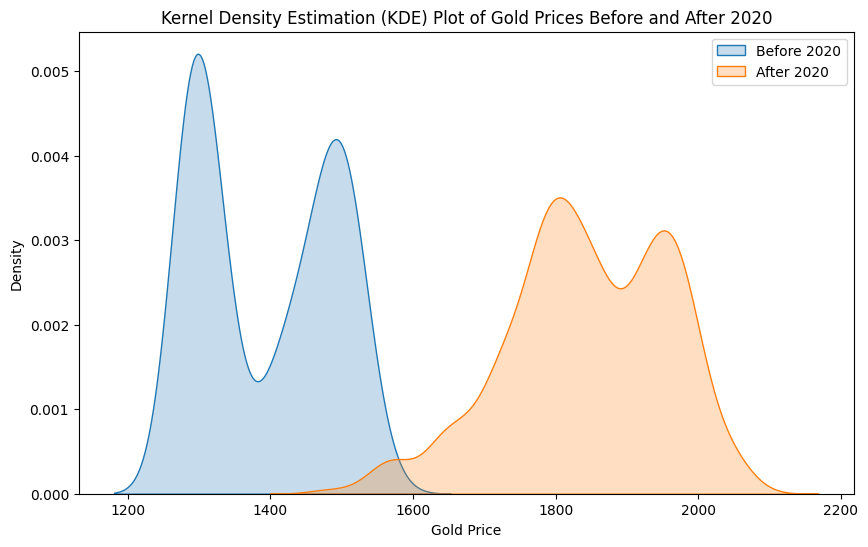

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 6))

# KDE plot of gold prices before 2020
sns.kdeplot(period1['Price'], label='Before 2020', shade=True)

# KDE plot of gold prices after 2020
sns.kdeplot(period2['Price'], label='After 2020', shade=True)

# Add labels and title
plt.title('Kernel Density Estimation (KDE) Plot of Gold Prices Before and After 2020')
plt.xlabel('Gold Price')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()
